<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/cca_repeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_science.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100


,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [5]:
df.shape

(19158, 13)

In [10]:
cols=[var for var in df.columns if df[var].isnull().mean() <0.05 and df[var].isnull().mean()>0]

In [11]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
10539,0.939,no_enrollment,Graduate,11.0,84.0
12867,0.624,no_enrollment,Graduate,4.0,33.0
14092,0.624,no_enrollment,Graduate,2.0,86.0
17431,0.579,no_enrollment,Graduate,7.0,43.0
1839,0.579,Part time course,High School,3.0,NaN


In [14]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [15]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

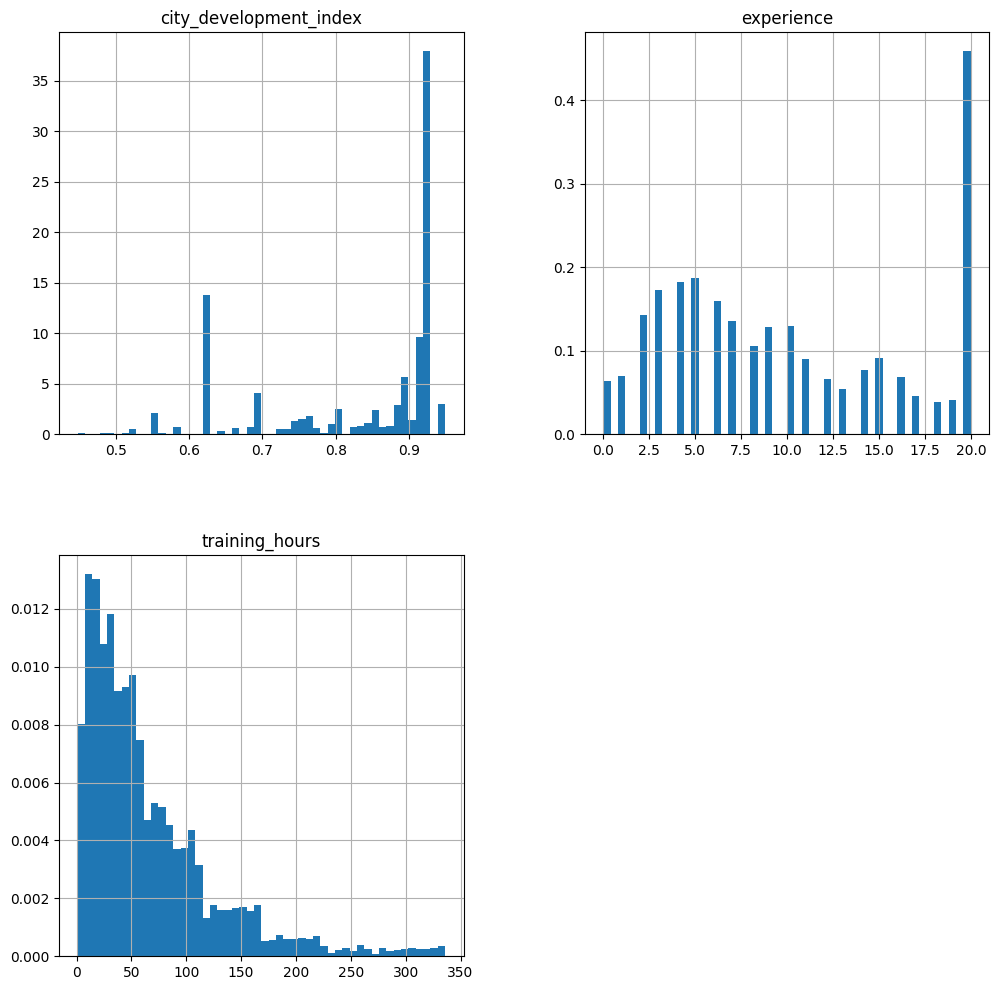

In [16]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

<Axes: ylabel='Density'>

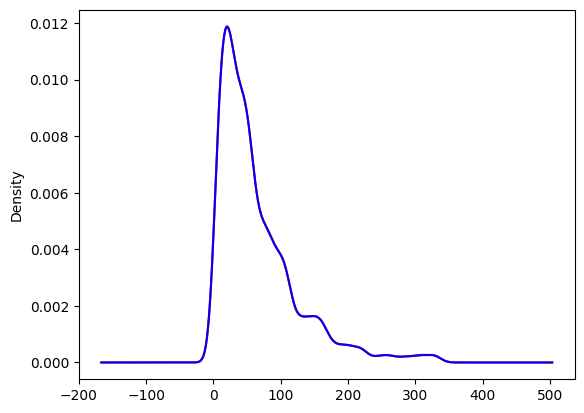

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original data
df['training_hours'].plot.density(color='red')
#new data cca
new_df['training_hours'].plot.density(color='blue')

<Axes: ylabel='Density'>

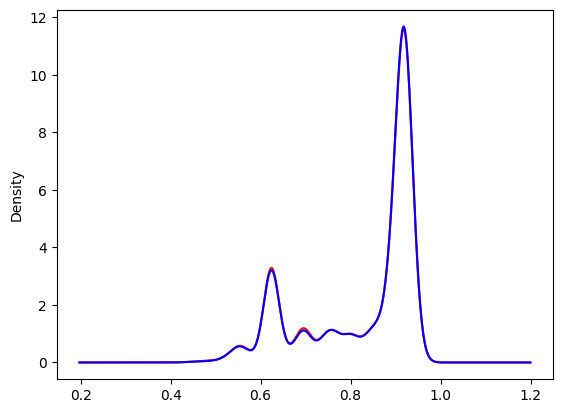

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original data
df['city_development_index'].plot.density(color='red')
#new data cca
new_df['city_development_index'].plot.density(color='blue')

<Axes: ylabel='Density'>

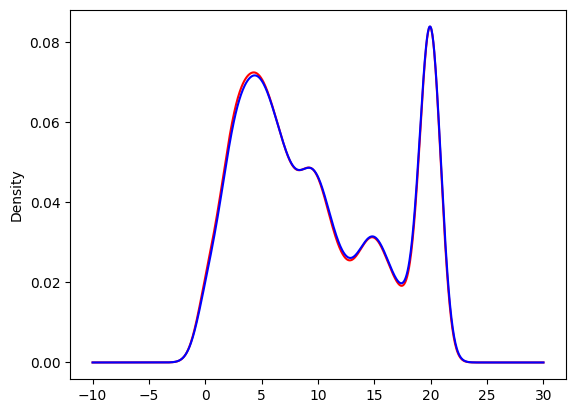

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original data
df['experience'].plot.density(color='red')
#new data cca
new_df['experience'].plot.density(color='blue')

In [20]:
temp=pd.concat([
    #percentage of observations per category,original data
    df['enrolled_university'].value_counts()/len(df),
    #percentage of observations per category,cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)
temp.columns=['Original','CCA']
temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
